In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
listings = pd.read_csv('..\listings.csv')

In [3]:
listings.head(2)

,Unnamed: 0,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,0,XXII,"22nd Century Group, Inc",1.33,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.00,1.266333e+09,1986.0,NaN,NaN,amex


### The highest median market capitalization

In [4]:
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)
listings = listings.drop('Market Capitalization', axis=1)

amex


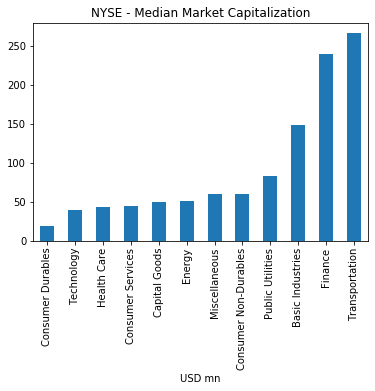

nasdaq


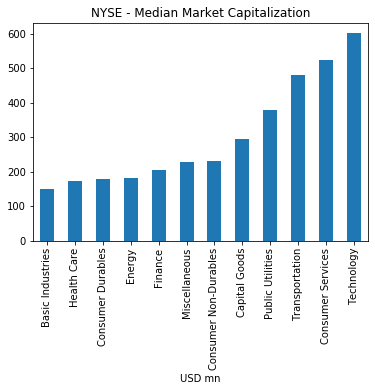

nyse


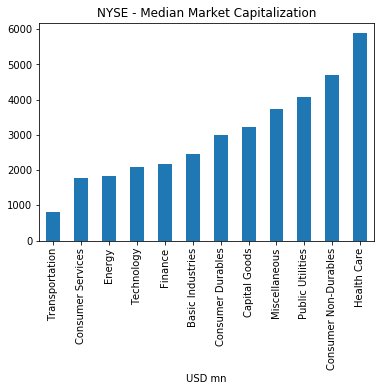

In [5]:
exchanges = ['amex', 'nasdaq', 'nyse']

for exchange in exchanges:
    print(exchange)
    df_exchange = listings[listings.Exchange == exchange]
    mcap_by_sector = df_exchange.groupby('Sector')
    median_mcap_by_sector = mcap_by_sector.market_cap_m.median()
    median_mcap_by_sector = median_mcap_by_sector.sort_values(ascending=True)
    median_mcap_by_sector.plot(kind='bar', title='NYSE - Median Market Capitalization')

    plt.xlabel('USD mn')
    plt.show()

Sector            Exchange
Basic Industries  amex         148.564581
                  nasdaq       150.385214
                  nyse        2450.240499
Capital Goods     amex          49.596035
                  nasdaq       293.801019
Name: market_cap_m, dtype: float64


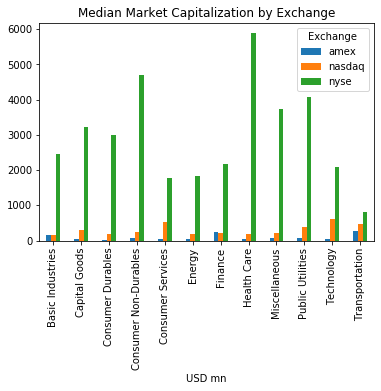

In [6]:
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

print(mcap_by_sector_exchange.head())

mcap_unstacked = mcap_by_sector_exchange.unstack()
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')
plt.xlabel('USD mn')
plt.show()